In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [53]:
ds_alps = xr.open_mfdataset('output_20yr/RGI05/control/control_batch_*.nc')
ds_alps_a = xr.open_mfdataset('output_20yr/RGI05/AMOCoffm1/AMOCoff_m1_batch_*.nc')
ds_alps_a2 = xr.open_mfdataset('output_20yr/RGI05/AMOCoffm2/AMOCoff_m2_batch_*.nc')

In [48]:
ds_alps

<xarray.Dataset>
Dimensions:         (time: 121, rgi_id: 19306)
Coordinates:
  * time            (time) float64 2e+03 2.001e+03 ... 2.119e+03 2.12e+03
  * rgi_id          (rgi_id) object 'RGI60-05.00001' ... 'RGI60-05.20280'
    hydro_year      (time) int64 dask.array<chunksize=(121,), meta=np.ndarray>
    hydro_month     (time) int64 dask.array<chunksize=(121,), meta=np.ndarray>
    calendar_year   (time) int64 dask.array<chunksize=(121,), meta=np.ndarray>
    calendar_month  (time) int64 dask.array<chunksize=(121,), meta=np.ndarray>
Data variables:
    volume          (time, rgi_id) float32 dask.array<chunksize=(121, 1000), meta=np.ndarray>
    volume_bsl      (time, rgi_id) float32 dask.array<chunksize=(121, 1000), meta=np.ndarray>
    area            (time, rgi_id) float32 dask.array<chunksize=(121, 1000), meta=np.ndarray>
    water_level     (rgi_id) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
    glen_a          (rgi_id) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
    fs              (rgi_id) float32 dask.array<chunksize=(1000,), meta=np.ndarray>
Attributes:
    description:    OGGM model output
    oggm_version:   1.6.3.dev10+g24a25ac
    calendar:       365-day no leap
    creation_date:  2025-06-09 05:44:23

In [54]:
vol_alps = ds_alps.volume.sum(dim='rgi_id')
vol_alps_a = ds_alps_a.volume.sum(dim='rgi_id')
vol_alps_a2 = ds_alps_a2.volume.sum(dim='rgi_id')

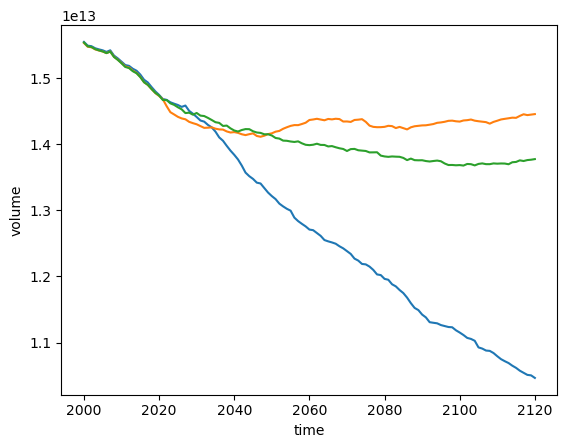

In [55]:
vol_alps.plot();
vol_alps_a.plot();
vol_alps_a2.plot();

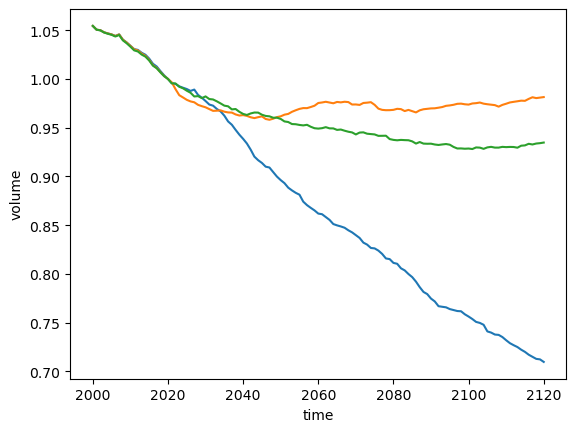

In [56]:
(vol_alps / vol_alps.sel(time=2020)).plot();
(vol_alps_a / vol_alps_a.sel(time=2020)).plot();
(vol_alps_a2 / vol_alps_a2.sel(time=2020)).plot();

In [ ]:
vol_alps.to_netcdf()

In [27]:
stats_alps = pd.read_csv('/home/users/fmaussion/www_oggm/gdirs/oggm_v1.6/L3-L5_files/2023.3/elev_bands/W5E5_spinup/RGI62/b_160/L5/summary/climate_statistics_11.csv')

In [28]:
stats_alps

rgi_id  rgi_region rgi_subregion                       name  \
0     RGI60-11.00001          11         11-01                        NaN   
1     RGI60-11.00002          11         11-01                        NaN   
2     RGI60-11.00003          11         11-01                        NaN   
3     RGI60-11.00004          11         11-01                        NaN   
4     RGI60-11.00005          11         11-01                        NaN   
...              ...         ...           ...                        ...   
3922  RGI60-11.03923          11         11-01   Canin Ovest It4L00003004   
3923  RGI60-11.03924          11         11-01  Montasio Est It4L00003001   
3924  RGI60-11.03925          11         11-01                Canin Est I   
3925  RGI60-11.03926          11         11-01     Canin Est It4L00003002   
3926  RGI60-11.03927          11         11-01              Conca Prevala   

       cenlon   cenlat  rgi_area_km2 glacier_type     terminus_type  \
0     13.5987  47.4949         0.122      Glacier  Land-terminating   
1     13.6135  47.4845         2.292      Glacier  Land-terminating   
2     13.5960  47.4835         0.851      Glacier  Land-terminating   
3     13.5829  47.4807         0.053      Glacier  Land-terminating   
4     13.6026  47.4774         0.057      Glacier  Land-terminating   
...       ...      ...           ...          ...               ...   
3922  13.4440  46.3620         0.035      Glacier  Land-terminating   
3923  13.4440  46.4370         0.037      Glacier  Land-terminating   
3924  13.4480  46.3650         0.010      Glacier  Land-terminating   
3925  13.4510  46.3660         0.013      Glacier  Land-terminating   
3926  13.4740  46.3680         0.015      Glacier  Land-terminating   

                  status  ...  1980-2010_avg_temp_min_elev  \
0     Glacier or ice cap  ...                    -0.671177   
1     Glacier or ice cap  ...                    -0.695125   
2     Glacier or ice cap  ...                    -1.253370   
3     Glacier or ice cap  ...                    -1.328163   
4     Glacier or ice cap  ...                    -3.659788   
...                  ...  ...                          ...   
3922  Glacier or ice cap  ...                    -1.575608   
3923  Glacier or ice cap  ...                     1.118046   
3924  Glacier or ice cap  ...                    -1.171950   
3925  Glacier or ice cap  ...                    -0.837348   
3926  Glacier or ice cap  ...                     1.160613   

      1980-2010_avg_tempmelt_ela_h  1980-2010_avg_tempmelt_mean_elev  \
0                        29.211123                         32.520822   
1                        23.710865                         23.251051   
2                        23.950657                         25.342236   
3                        28.747092                         27.614623   
4                        19.209228                         17.810388   
...                            ...                               ...   
3922                     39.615313                         31.631959   
3923                     45.323074                         48.463360   
3924                     33.844837                         34.851913   
3925                     35.615937                         36.681865   
3926                     46.014221                         49.338822   

      1980-2010_avg_tempmelt_max_elev  1980-2010_avg_tempmelt_min_elev  \
0                           27.673257                        35.202509   
1                           14.157864                        35.058045   
2                           18.390480                        31.712420   
3                           25.450591                        31.273316   
4                           16.863315                        18.615979   
...                               ...                              ...   
3922                        30.004286                        32.995456   
3923                        46.737

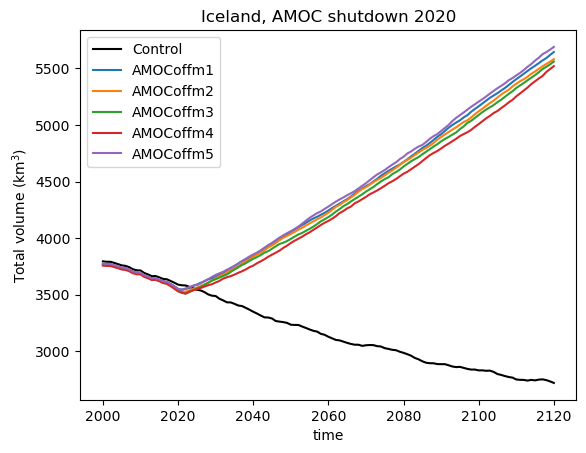

In [22]:
df1 = pd.read_csv('output_20yr/RGI06/control/control_batch_81.csv', index_col=0) * 1e-9
df2 = pd.read_csv('output_20yr/RGI06/AMOCoffm1/AMOCoff_m1_batch_81.csv', index_col=0) * 1e-9
df3 = pd.read_csv('output_20yr/RGI06/AMOCoffm2/AMOCoff_m2_batch_81.csv', index_col=0) * 1e-9
df4 = pd.read_csv('output_20yr/RGI06/AMOCoffm3/AMOCoff_m3_batch_81.csv', index_col=0) * 1e-9
df5 = pd.read_csv('output_20yr/RGI06/AMOCoffm4/AMOCoff_m4_batch_81.csv', index_col=0) * 1e-9
df6 = pd.read_csv('output_20yr/RGI06/AMOCoffm5/AMOCoff_m5_batch_81.csv', index_col=0) * 1e-9

df1.volume.plot(color='k', label='Control');
df2.volume.plot(label='AMOCoffm1');
df3.volume.plot(label='AMOCoffm2');
df4.volume.plot(label='AMOCoffm3');
df5.volume.plot(label='AMOCoffm4');
df6.volume.plot(label='AMOCoffm5');
plt.legend();
plt.title('Iceland, AMOC shutdown 2020'); plt.ylabel('Total volume (km$^3$)');

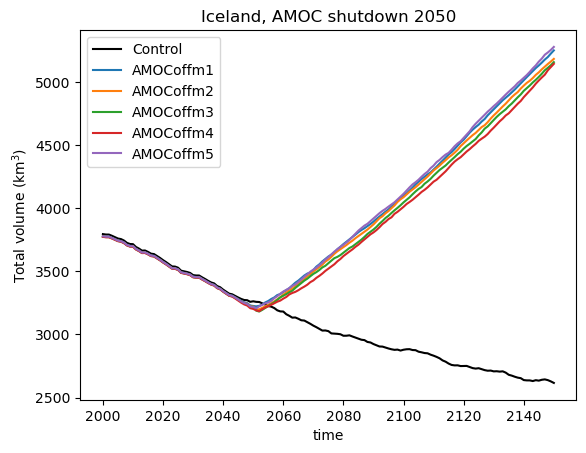

In [23]:
df1 = pd.read_csv('output_50yr/RGI06/control/control_batch_81.csv', index_col=0) * 1e-9
df2 = pd.read_csv('output_50yr/RGI06/AMOCoffm1/AMOCoff_m1_batch_81.csv', index_col=0) * 1e-9
df3 = pd.read_csv('output_50yr/RGI06/AMOCoffm2/AMOCoff_m2_batch_81.csv', index_col=0) * 1e-9
df4 = pd.read_csv('output_50yr/RGI06/AMOCoffm3/AMOCoff_m3_batch_81.csv', index_col=0) * 1e-9
df5 = pd.read_csv('output_50yr/RGI06/AMOCoffm4/AMOCoff_m4_batch_81.csv', index_col=0) * 1e-9
df6 = pd.read_csv('output_50yr/RGI06/AMOCoffm5/AMOCoff_m5_batch_81.csv', index_col=0) * 1e-9

df1.volume.plot(color='k', label='Control');
df2.volume.plot(label='AMOCoffm1');
df3.volume.plot(label='AMOCoffm2');
df4.volume.plot(label='AMOCoffm3');
df5.volume.plot(label='AMOCoffm4');
df6.volume.plot(label='AMOCoffm5');
plt.legend();
plt.title('Iceland, AMOC shutdown 2050'); plt.ylabel('Total volume (km$^3$)');

In [23]:
ds_gree = xr.open_mfdataset('output_20yr/RGI05/control/control_batch_*.nc')
ds_gree_a = xr.open_mfdataset('output_20yr/RGI05/AMOCoffm3/AMOCoff_m3_batch_*.nc')

In [24]:
stats_gree = pd.read_csv('/home/users/fmaussion/www_oggm/gdirs/oggm_v1.6/L3-L5_files/2023.3/elev_bands/W5E5_spinup/RGI62/b_160/L5/summary/climate_statistics_05.csv')

In [25]:
ids_east = stats_gree.loc[stats_gree.cenlon>-40]['rgi_id'].values
ids_west = stats_gree.loc[stats_gree.cenlon<=-40]['rgi_id'].values

In [26]:
ts_east = ds_gree.sel(rgi_id=ids_east).volume.sum(dim='rgi_id')
ts_west = ds_gree.sel(rgi_id=ids_west).volume.sum(dim='rgi_id')

ts_a_east = ds_gree_a.sel(rgi_id=ids_east).volume.sum(dim='rgi_id')
ts_a_west = ds_gree_a.sel(rgi_id=ids_west).volume.sum(dim='rgi_id')

In [27]:
df = ts_east.to_dataframe()[['volume']]
df.columns = ['East ctrl']
df['East AMOC'] = ts_a_east.to_dataframe()[['volume']]

df['West'] = ts_west.to_dataframe()[['volume']]
df['West AMOC'] = ts_a_west.to_dataframe()[['volume']]

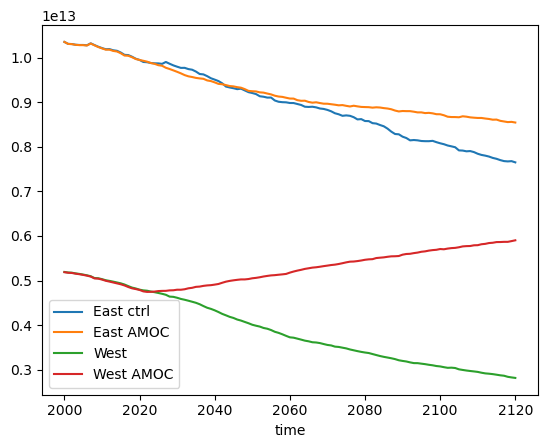

In [28]:
df.plot();

In [31]:
ds_r = xr.open_dataset('~/www_fmaussion/misc/amoc_inch/prepend_20yrs/amoc_tas_20yr_control.nc')
ds_a = xr.open_dataset('/home/users/fmaussion/www_fmaussion/misc/amoc_inch/prepend_20yrs/amoc_tas_20yr_AMOCoff_m1.nc')

In [41]:
ts_ctrl = ds_r.sel(lon=160, lat=75, method='nearest').load()
ts_a = ds_a.sel(lon=160, lat=75, method='nearest').load()

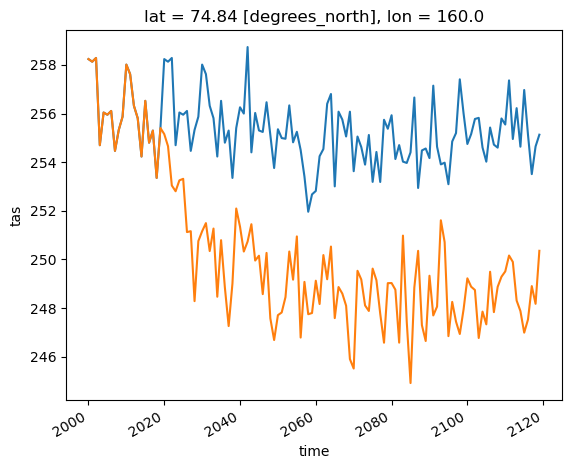

In [42]:
ts_ctrl.tas.resample(time='AS').mean().plot();
ts_a.tas.resample(time='AS').mean().plot();

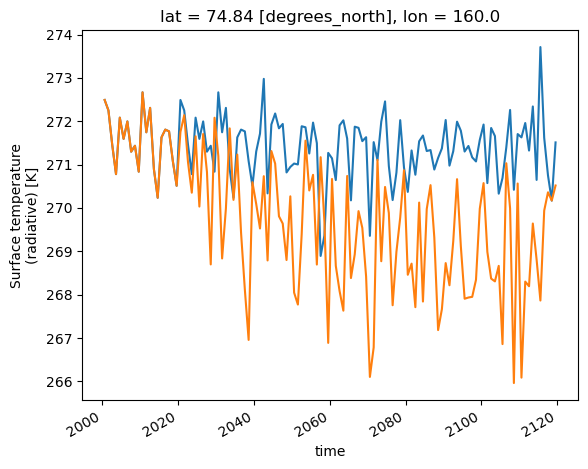

In [44]:
ts_ctrl.tas.sel(time=ts_ctrl['time.month']==8).plot();
ts_a.tas.sel(time=ts_ctrl['time.month']==8).plot();

In [39]:
ts_ctrl['time.month']

<xarray.DataArray 'month' (time: 1440)>
array([ 1,  2,  3, ..., 10, 11, 12])
Coordinates:
  * time        (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2119-12-01
    lat         float64 74.84
    lon         float64 160.0
    simulation  <U7 'control'